## Common Probability Distributions

#### 1. Uniform Distribution

Uniform distribution models situations where all values in a range are equally likely.
No preference inside the interval.

Represents maximum uncertainty with bounds.
Used in:
- Parameter initialization
- random sampling
- exploration (Reinforcement Learning)

**Loss:**
No meaningful likelihood-based loss is typically optimized with uniform.
It's used for sampling, not modeling outputs.

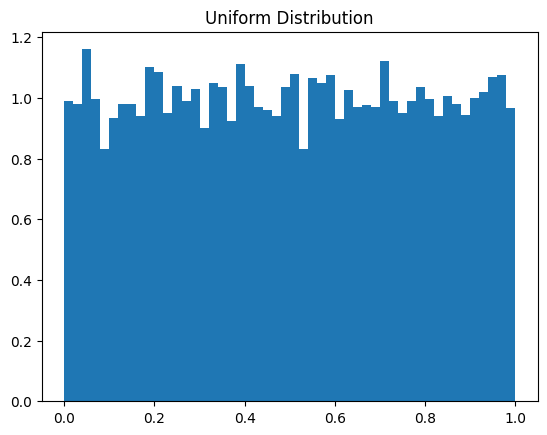

Mean: 0.5007744021685194 Std: 0.28850632708793855


In [2]:
import numpy as np
import matplotlib.pyplot as plt

samples = np.random.uniform(0, 1, 10000)

plt.hist(samples, bins=50, density=True)
plt.title("Uniform Distribution")
plt.show()

print("Mean:", samples.mean(), "Std:", samples.std())


### 2. Bernoulli Distribution

Bernoulli is a discrete distribution: a single trial with two outcomes, usually labeled 0 and 1. It directly models binary labels.

Example:
You have a coin. You flip it once. 
Outcome = heads or tails.

So Bernoulli is a single yes/no trial.
Probability of 1 (head) = p
Probability of 0 (tails) = 1-p

The mean is the probability of success, the variance measures uncertainty in the outcome.

**Loss:**
Binary cross-entropy is derived as the negative log-likelihood of Bernoulli. If the model outputs probabilities for 0/1, this is the natural loss

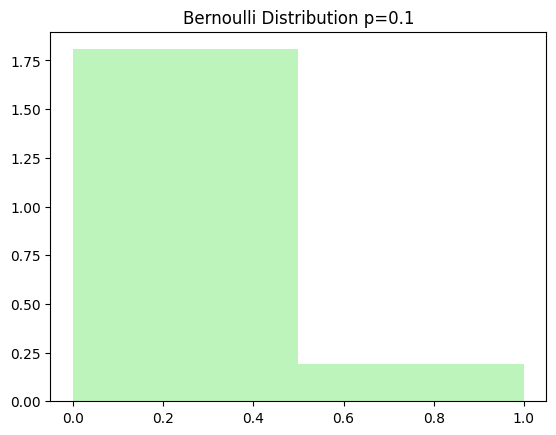

Mean: 0.0963 Std: 0.2950022203306273


In [13]:
p = 0.1 # probability of success
samples = np.random.binomial(1, p, 10000)  # Bernoulli trial

plt.hist(samples, bins=2, density=True, alpha=0.6, color='lightgreen')
plt.title(f"Bernoulli Distribution p={p}")
plt.show()

print("Mean:", samples.mean(), "Std:", samples.std())


Here, Most outcomes are 1 (because p = 0.7)

### 3. Binomial Distribution

Binomial distribution generalizes to Bernoulli to multiple independent trials. It counts how many successes occur in a fixed number of trials.

Example:
Instead of 1 coin flip, you flip n coins.
Count how many heads you get.

That's Binomial.

If you batch samples, it tells you likely range of successes.
In ML, its helpful for predicting number of occurrences in a fixed set (or batch statistics)

**Loss:**
If you are predicting counts, the binomial likelihood can be used. Often appears in probabilistic models where outcomes are "number of successes in n trials."

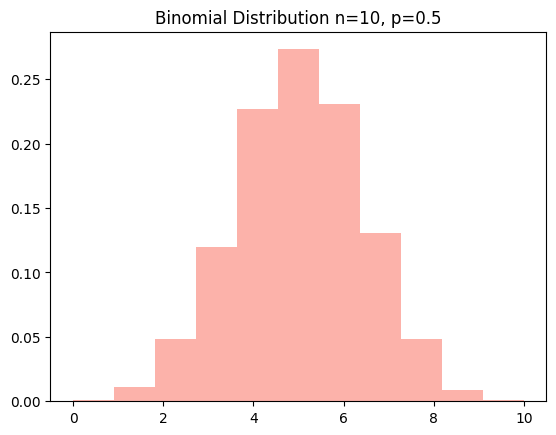

Mean: 5.0141 Std: 1.5661740612077573


In [8]:
n, p = 10, 0.5
samples = np.random.binomial(n, p, 10000)

plt.hist(samples, bins=n+1, density=True, alpha=0.6, color='salmon')
plt.title("Binomial Distribution n=10, p=0.5")
plt.show()

print("Mean:", samples.mean(), "Std:", samples.std())

### 4. Poisson Distribution

Poisson models the number of events occuring in a fixed interval when events are rare and indenpendant. The mean equals the variance. 

Examples:
Count the car passing in 1 minute. The number of car is independant and rare in each minute. That number of car in each minute is Poisson distributed.



It is used in ML for count prediction tasks, like traffic flow or word occurences.

**Loss:**
Poisson negative log-likelihood is used as the loss when predicting counts.

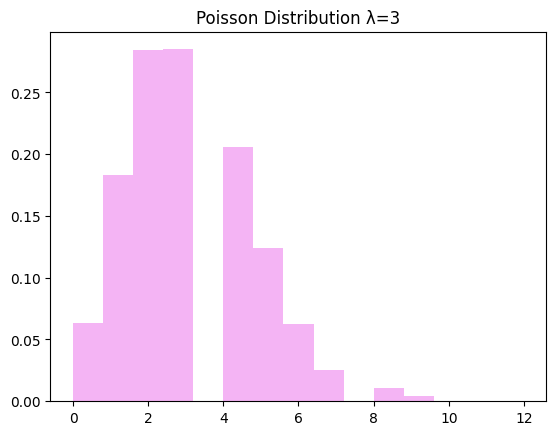

Mean: 2.9901 Std: 1.7279473342668752


In [9]:
lam = 3
samples = np.random.poisson(lam, 10000)

plt.hist(samples, bins=15, density=True, alpha=0.6, color='violet')
plt.title("Poisson Distribution λ=3")
plt.show()

print("Mean:", samples.mean(), "Std:", samples.std())


### 5. Exponential Distribution

Exponential models the time until the next event in the Poisson process. It has memoryless property: the probability of waiting longer doesn't depend on how long you already waited. Useful in survival analysis, queuing and reliability tasks.

**Loss:**
Negative log-likelihood of exponential is used when predicting durations or time-to-event.

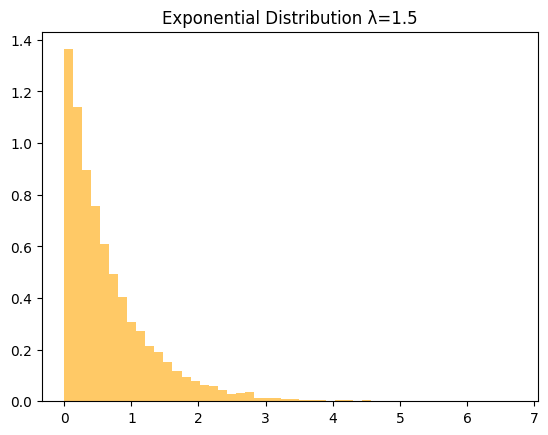

Mean: 0.6585340987733033 Std: 0.6583999516107016


In [10]:
lam = 1.5
samples = np.random.exponential(1/lam, 10000)  # scale = 1/λ

plt.hist(samples, bins=50, density=True, alpha=0.6, color='orange')
plt.title("Exponential Distribution λ=1.5")
plt.show()

print("Mean:", samples.mean(), "Std:", samples.std())


### 6. Normal (Gaussian) Distribution

It is the most important distribution in ML. Many natural processes (or sums of small independent effects) are approximately Gaussian due to the Central Limit Theorem.

Mean gives the central tendency, std measures noise. It's smooth and differentiable, which is why it underlies many ML models.

**Loss:**
- MSE = negtive log-likelihood of Gaussian
- Output assumptions for regression

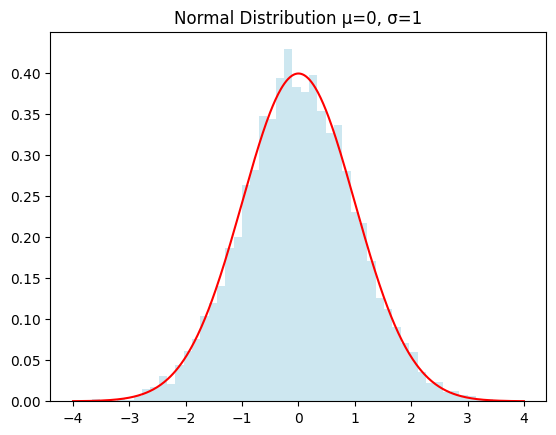

Mean: 0.012060057836254605 Std: 1.0097142501079652


In [11]:
from scipy.stats import norm

mu, sigma = 0, 1
samples = np.random.normal(mu, sigma, 10000)

plt.hist(samples, bins=50, density=True, alpha=0.6, color='lightblue')
x = np.linspace(-4,4,500)
plt.plot(x, norm.pdf(x, mu, sigma), 'r')
plt.title("Normal Distribution μ=0, σ=1")
plt.show()

print("Mean:", samples.mean(), "Std:", samples.std())
